In [2]:
pip install cdlib

You should consider upgrading via the '/usr/local/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from operator import itemgetter
import powerlaw
from networkx.drawing.nx_agraph import graphviz_layout
import pickle
from statistics import mean, stdev
import seaborn as sns
import json

In [2]:
from cdlib import algorithms

Note: to be able to use all crisp methods, you need to install some additional packages:  {'karateclub', 'leidenalg', 'infomap'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'karateclub', 'ASLPAw'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'leidenalg', 'infomap'}


In [3]:
path_subgraph = "/Users/damon/Desktop/Dessertion/2-Network Analysis/"

In [4]:
def plot_centralities(first, name_f, second, name_s, third, name_t, n):

    lista = [(k, v) for k, v in first.items()]
    lista.sort(key=lambda x: x[1], reverse = True)
    tops = lista[:n]
    first_ = []
    second_ = []
    third_ = []
    for i in tops:
        first_.append(first[i[0]])
        second_.append(second[i[0]])
        third_.append(third[i[0]])
        
    tops = [i for i,j in tops]
    tops = tops[::-1]
    first_ = first_[::-1]
    second_ = second_[::-1]
    third_ = third_[::-1]
    
    fig = plt.figure(figsize = (25,8), dpi = 300)

    fontsize = 17
    plt.rcParams.update({'font.size': fontsize})
    ax = fig.add_subplot(151)
    plt.barh(tops,first_, color = "#31A894")
    plt.grid(axis = 'both', alpha = .3)
    plt.xlabel(name_f)

    ax2 = fig.add_subplot(152)
    plt.barh(tops,second_, color = "#315FA8")
    plt.grid(axis = 'both', alpha = .3)
    plt.setp(ax2.get_yticklabels(), visible = False)
    plt.xlabel(name_s)

    ax3 = fig.add_subplot(153)
    plt.barh(tops,third_, color = "#5D2FA5")
    plt.grid(axis = 'both', alpha = .3)
    plt.setp(ax3.get_yticklabels(), visible = False)
    plt.xlabel(name_t)
    plt.show()

In [5]:
path_graph = "/Users/damon/Desktop/Dessertion/2-Network Analysis/"

In [6]:
G = nx.read_graphml(path_graph+"Real_Network.graphml")

In [7]:
ba_G = nx.read_graphml(path_graph+"BA_Network.graphml")
er_G = nx.read_graphml(path_graph+"ER_Network.graphml")
ws_G = nx.read_graphml(path_graph+"WS_Network.graphml")
cm_G = nx.read_graphml(path_graph+"CM_Network.graphml")

In [8]:
models = {
    "Real Network": G,
    "Barabasi Albert": ba_G,
    "Erdos Renyi": er_G,
    "Watts Strogatz": ws_G,
    "Configuration Model": cm_G
}

# 1 - Degree Centrality

In [9]:
degree_centrality = nx.degree_centrality(G)

In [10]:
new_centrality_nodes = [k for k, v in sorted(degree_centrality.items(), key=lambda item: item[1], reverse = True)]
new_df = pd.DataFrame({"Id": new_centrality_nodes})
new_df.to_csv("/Users/damon/Desktop/Dessertion/2-Network Analysis/centrality_degree_nodes.csv", index=False)

# 2 - Connectivity Based Centrality

In [11]:
eigenvector_centrality = nx.eigenvector_centrality(G, weight='Count',  max_iter=1000)

# 3 - PageRank centrality

In [12]:
pagerank_centrality = nx.pagerank(G, weight='Count', max_iter=1000)

In [13]:
nx.pagerank??

# 4 - Geometric Centrality

In [14]:
closeness_centrality = nx.closeness_centrality(G)

In [15]:
harmonic_centrality = nx.harmonic_centrality(G)

In [16]:
betweenness_centrality = nx.betweenness_centrality(G, weight='Count')

Plot

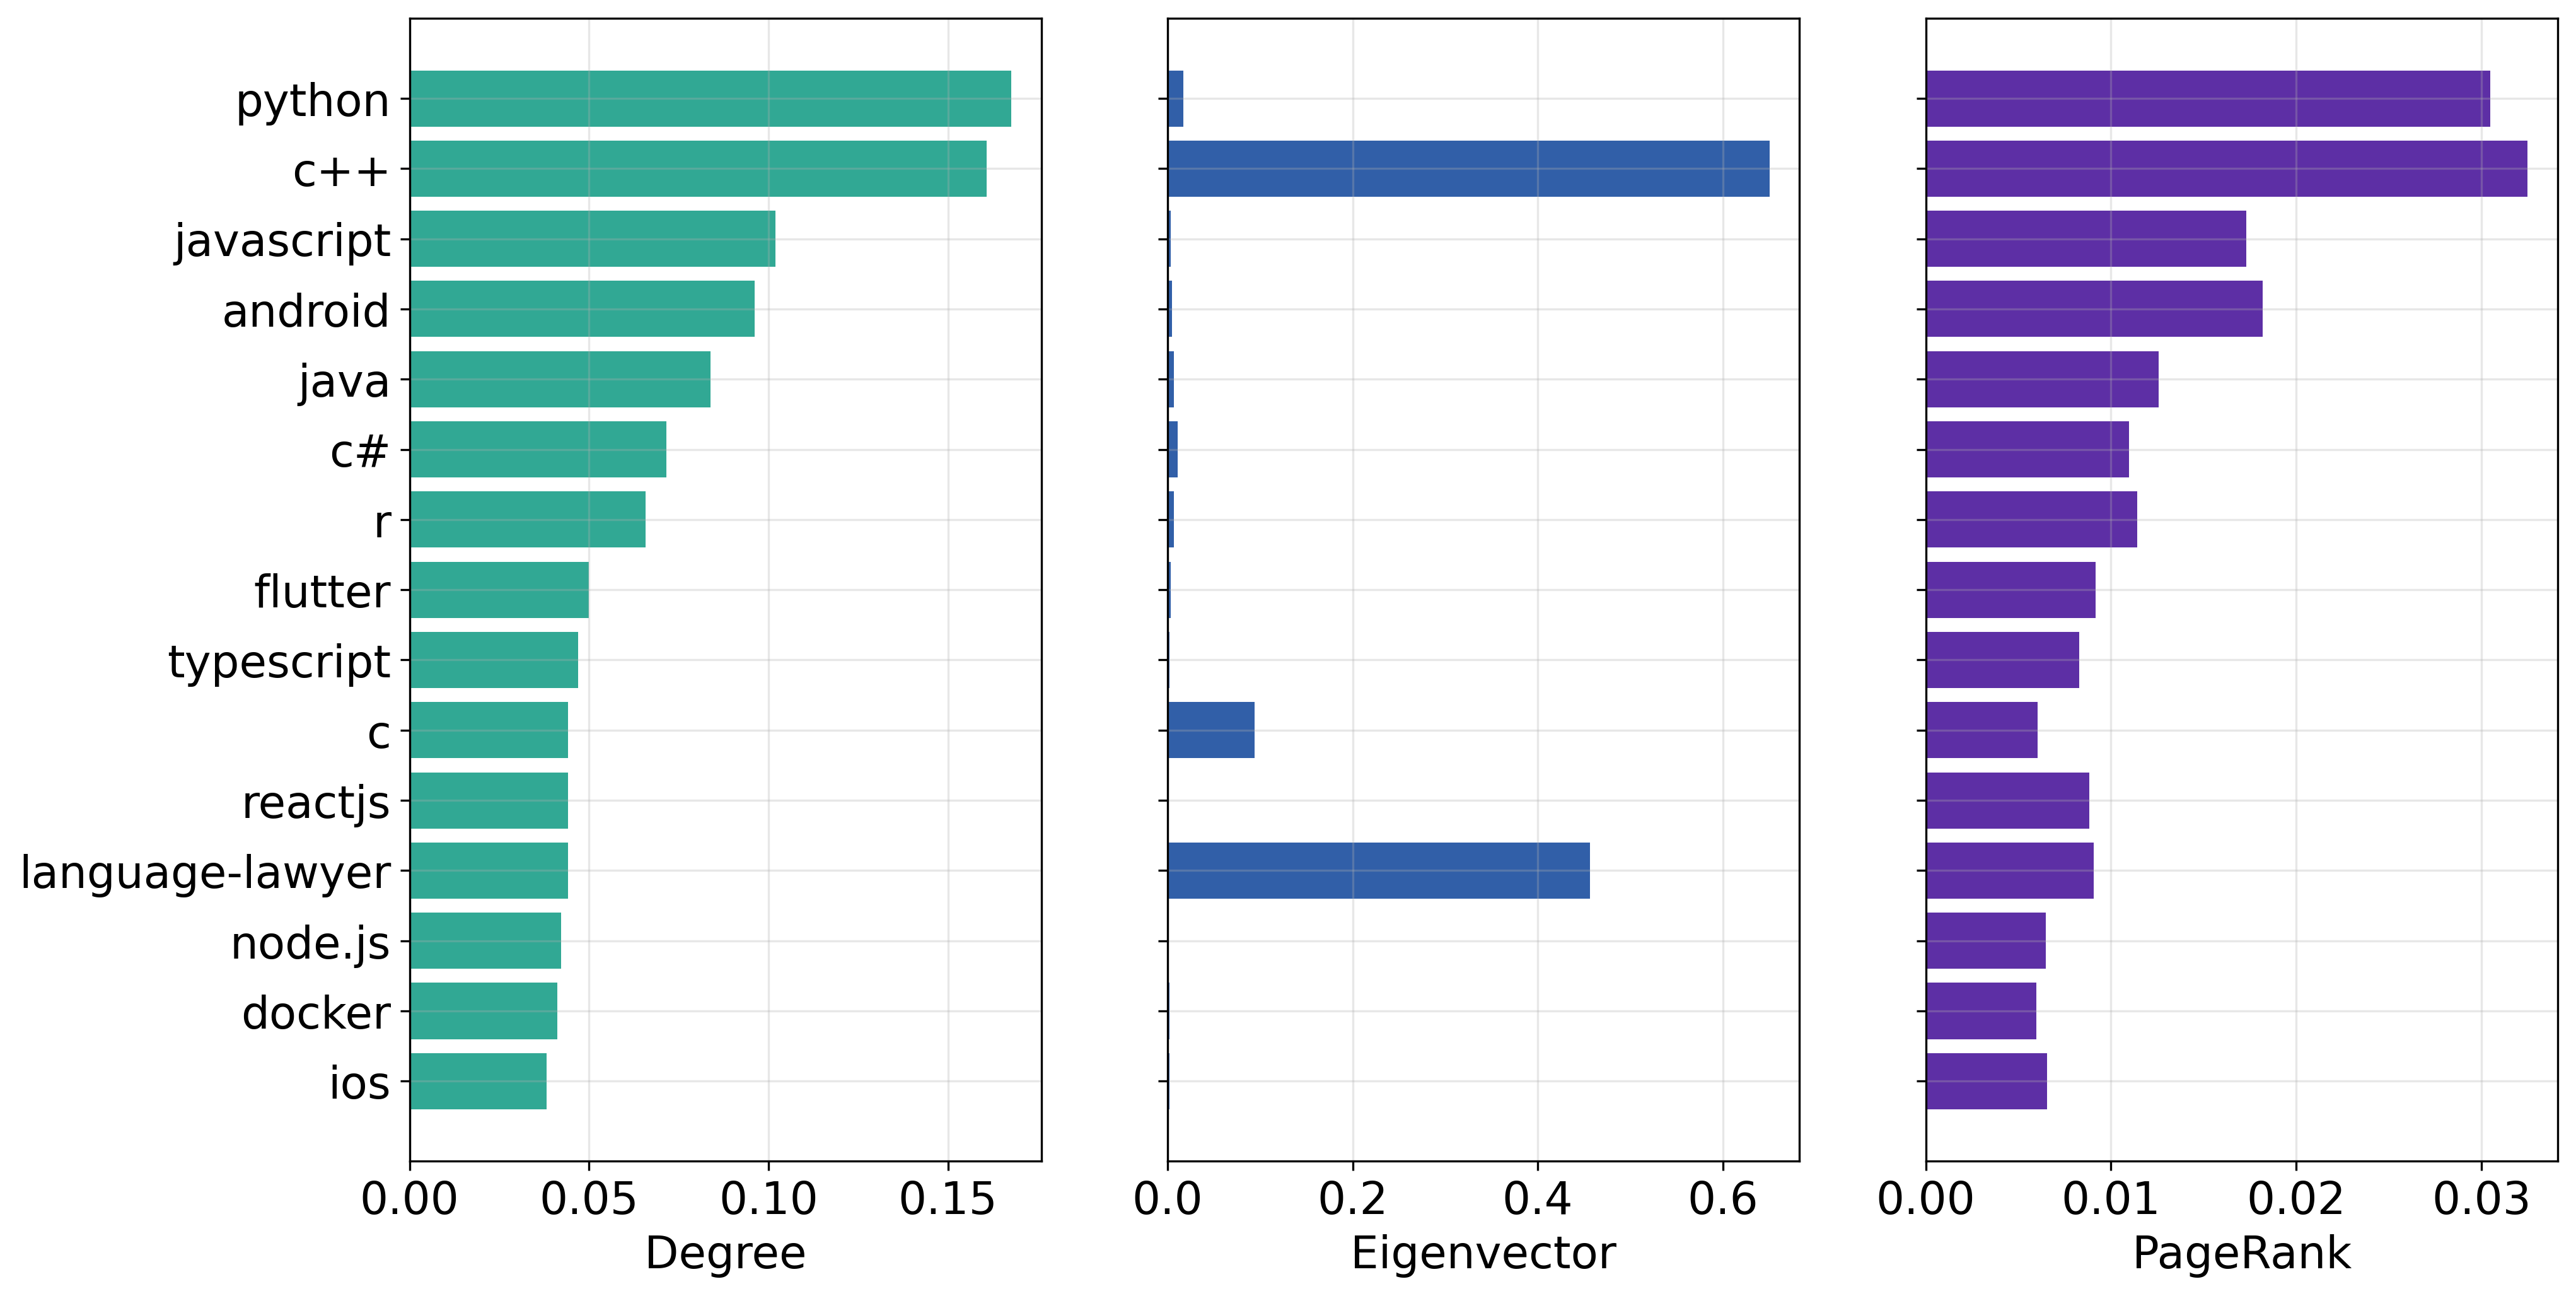

In [17]:
plot_centralities(degree_centrality, "Degree", eigenvector_centrality, "Eigenvector", pagerank_centrality, "PageRank", 15)

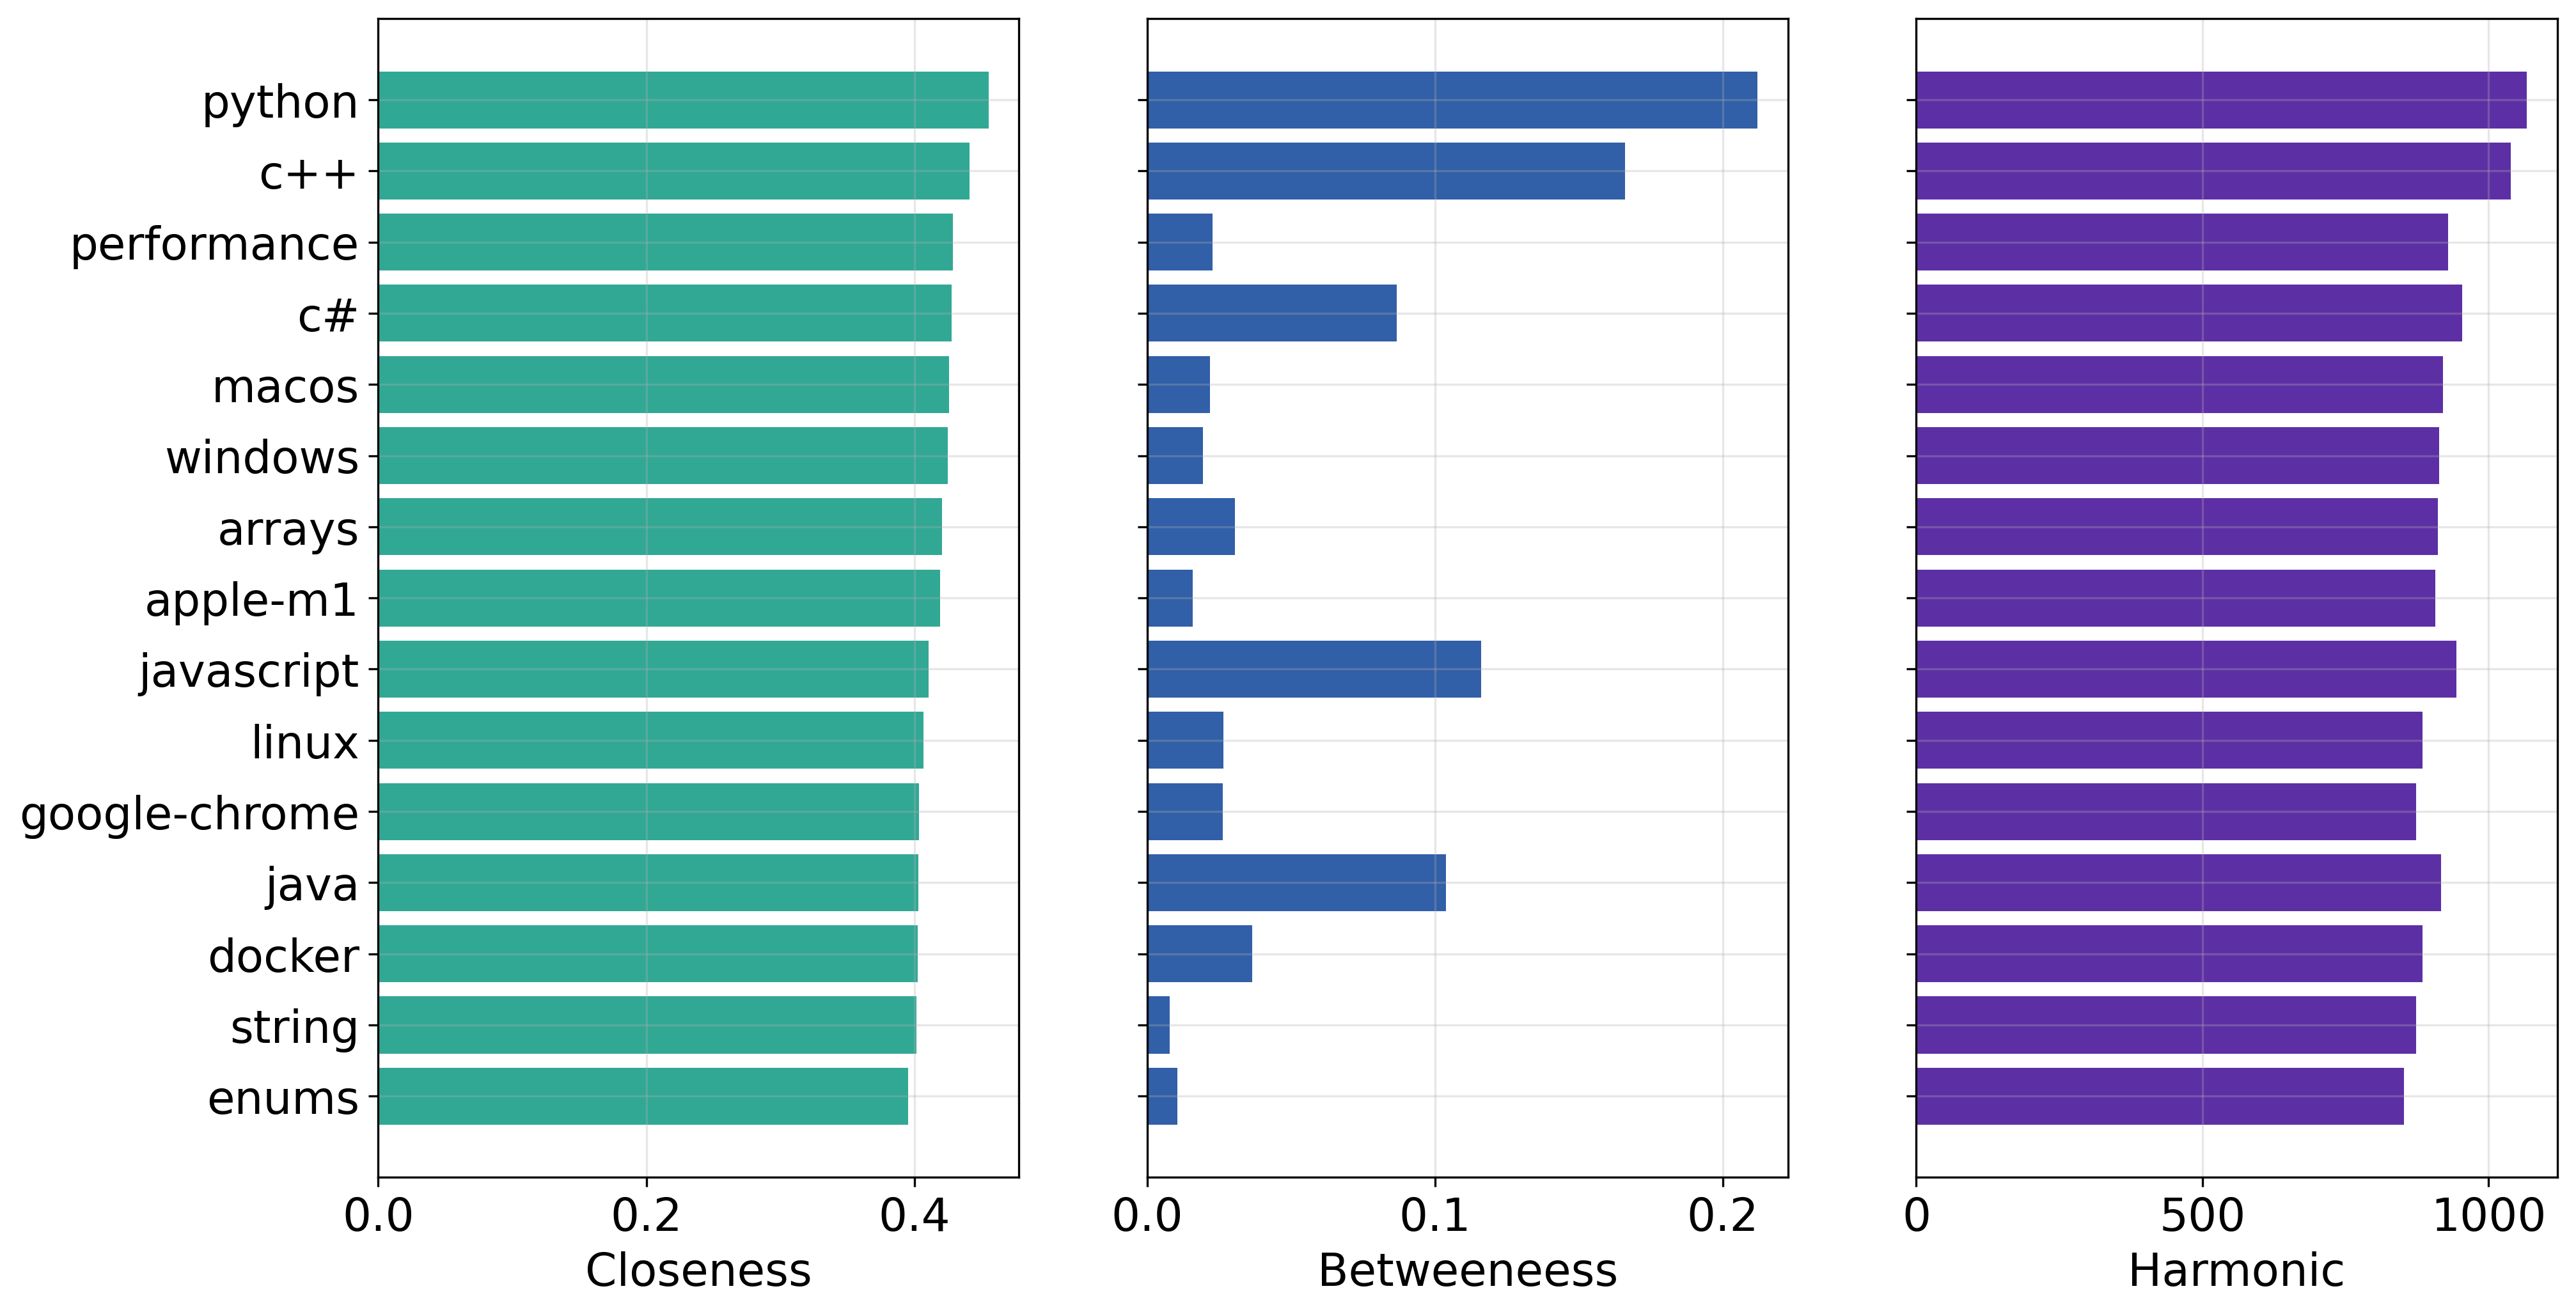

In [18]:
plot_centralities(closeness_centrality, "Closeness", betweenness_centrality, "Betweeneess", harmonic_centrality, "Harmonic", 15)

In [19]:
lista = [(k, v) for k, v in degree_centrality.items()]
lista.sort(key=lambda x: x[1], reverse = True)
tops = lista[:20]
tops = [i for i,j in tops]
H = G.subgraph(tops)
nx.write_gexf(H, path_subgraph+"centrality_subgraph.gexf")

### Storing central nodes

In [20]:
betweenness_centrality

{'assembly': 0.009976819431276162,
 'optimization': 0.0027951063152509507,
 'x86-64': 0.0017499038658035304,
 'cpu-architecture': 9.16720064606176e-05,
 'simd': 0.00014009409321153176,
 'c++': 0.1660621983228648,
 'rounding': 0.001828810494748402,
 'macos': 0.021712121008045475,
 'c': 0.021588196236507595,
 'clang': 0.0032115945434530438,
 'linux': 0.026523081374899383,
 'gcc': 0.008088928741809253,
 'vectorization': 0.0018370015314447914,
 'compiler-optimization': 0.0015138979596031332,
 'loops': 0.00271645130214321,
 'undefined-behavior': 0.0012695200813508866,
 'cpu-cache': 0.000620621136768098,
 'type-conversion': 0.0006755222374702278,
 'micro-optimization': 0.0003906542517477163,
 'bit-manipulation': 0.0,
 '6800': 0.0,
 'x86': 0.0012980235251480446,
 'arm64': 0.0004531342189780985,
 'nasm': 2.6701016771643804e-06,
 'calling-convention': 0.000668752835452142,
 'avx': 4.28585290461725e-05,
 'abi': 0.0003312456921370946,
 'disassembly': 0.0038523305349604285,
 'gnu-assembler': 0.0,


In [21]:
new_centrality = {k: v for k, v in sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse = True)}
new_centrality_nodes = [k for k, v in sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse = True)]

# 5 - Assortativity

Weighted graph

In [22]:
d_weighted = nx.degree_assortativity_coefficient(G, weight = "Count")

In [23]:
d_weighted

-0.15564106729489308

Text(0, 0.5, 'KNN(k)')

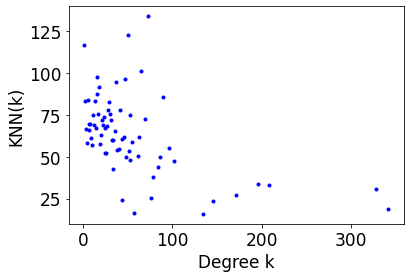

In [24]:
# Calcolo avg nearest neigh
## Compute the average degree connectivity of graph.
"""
The average degree connectivity is the average nearest neighbor degree of
    nodes with degree k. For weighted graphs, an analogous measure can
    be computed using the weighted average neighbors degree defined in
    [1]_, for a node `i`, as
"""
avg=nx.k_nearest_neighbors(G, weight = "Count")
y=list(avg.values())

# Calcolo vettore dei gradi
k=G.degree()
x=[]
for item in k:
    x.append(item[1])
    
output = []
for b in x:
       if b not in output:
            output.append(b)

# Plot
plt.plot(output,y,'b.')   
plt.xlabel('Degree k')
plt.ylabel('KNN(k)')

Unweighted graph

In [25]:
d=nx.degree_assortativity_coefficient(G)

In [26]:
d

-0.1769290671604548

Text(0, 0.5, 'KNN(k)')

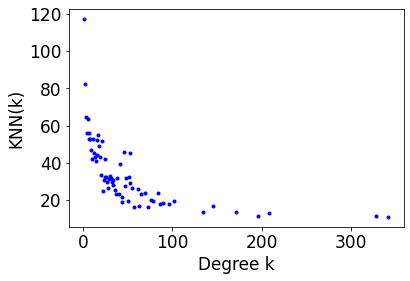

In [27]:
# Calcolo avg nearest neigh
avg=nx.k_nearest_neighbors(G)
y=list(avg.values())

# Calcolo vettore dei gradi
k=G.degree()
x=[]
for item in k:
    x.append(item[1])
    
output = []
for b in x:
       if b not in output:
            output.append(b)

# Plot
plt.plot(output,y,'b.')   
plt.xlabel('Degree k')
plt.ylabel('KNN(k)')